# Welcome 
Press \<space bar\> to move to next slide

Press \<shift> \<space bar\> to move to previous slide

%load_ext autoreload
%autoreload 2

In [26]:
%matplotlib inline

#from ipywidgets import interact,Dropdown,Checkbox
#from IPython.display import display, clear_output,Latex, Markdown
from IPython.display import clear_output
import pandas as pd
from tqdm.auto import tqdm 

#from modelinvert import targets_instruments
from modelclass import model
model.widescreen()
model.scroll_off()
from inject import inject # monkey patch special methods and properties 

model.modelflow_auto()

# The impact of increasing carbon tax
Simulate the model for different levels of a global carbon tax

Wait until all simulations are finished

Then press \<space bar\> to move on 

In [27]:
# select if the model is simulated for all experiments or the experiments are loaded 
solve_experiments = True 
# If the all experioments are performed, theese variables will be saved. 
keep_var = '*_CO2 *_yer *_hic *_head?? *_LNN'

# Make experiments 
if solve_experiments:
    if True or not 'masia' in locals():
        print('Load model')
        masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1,progressbar=1)
        inject(masia)    
    masia.keep_solutions={}
    thisdf = baseline.copy()
    masia(thisdf,keep = f'Business as usual',keep_variables=keep_var,progressbar=0)
    rate_var =  [f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]
    experiments = list(range(50,360,50))[:]
    bars = '{desc}: {percentage:3.0f}%|{bar}|Experiment {n_fmt}/{total_fmt}'
    with tqdm(total=len(experiments),desc='Simulating different taxrates',bar_format=bars) as pbar:
        for rate in experiments:
            thisdf = baseline.copy()
            thisdf.loc[2022,rate_var] = thisdf.loc[2021,rate_var] + rate
            masia(thisdf,keep = f'\\${rate}/tonne of $CO^2$',keep_variables=keep_var,progressbar=1)
            pbar.update()
    clear_output()
    masia.modeldump('co2impact.pcim',keep=1)
else: 
    print('Load model and saved solutions ')
    masia,baseline = model.modelload('co2impact.pcim',run=0)
    masia.basedf=baseline 
    masia.lastdf=baseline 
    inject(masia)    

print('Finished ')

Finished 


# The emissions in the different scenarios

In [28]:
masia.keep_solutions.keys()

dict_keys(['Business as usual', '\\$50/tonne of $CO^2$', '\\$100/tonne of $CO^2$', '\\$150/tonne of $CO^2$', '\\$200/tonne of $CO^2$', '\\$250/tonne of $CO^2$', '\\$300/tonne of $CO^2$', '\\$350/tonne of $CO^2$'])

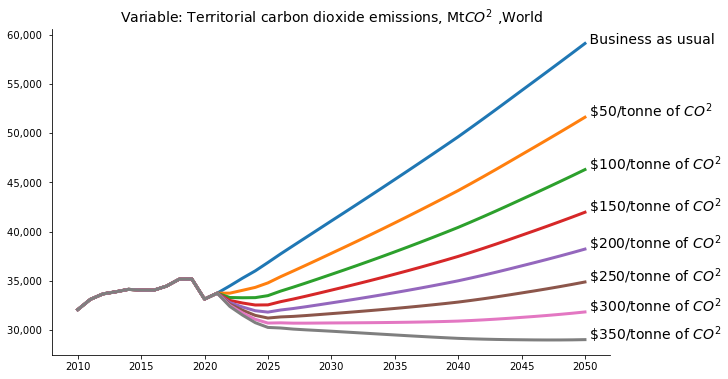

In [29]:
with masia.set_smpl(2010,2050):
    masia.keep_plot('wld_co2',legend=0)['WLD_CO2']

In [30]:
endvalues_ser = pd.Series({rate:df.loc[2050,'WLD_CO2'] for rate,df in masia.keep_solutions.items()})
endvalues = pd.DataFrame(endvalues_ser,columns = ['Global $CO^2$ emission']
                        ).rename(index={'Business as usual':'Business as u.'}).pipe(lambda df:df.rename(index={i:i.replace('of $CO^2$','') for i in df.index}))

# What happens to the global emissions in 2050 

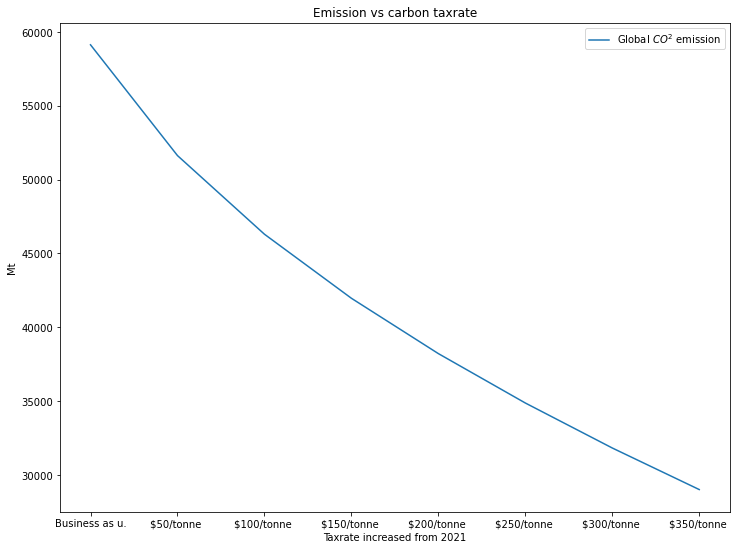

In [31]:
endvalues.plot(xlabel = 'Taxrate increased from 2021',ylabel = 'Mt',title='Emission vs carbon taxrate',figsize=(12,9));


# The marginal impact of the 50 extra tax in each simulation 

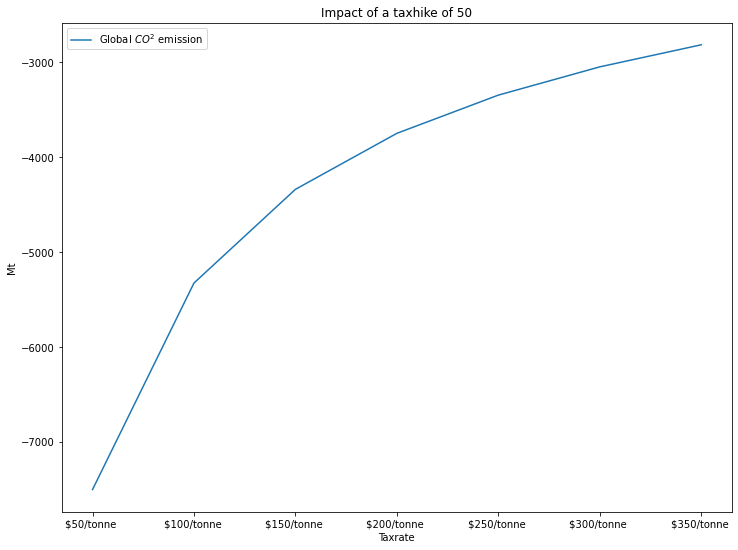

In [32]:
endvalues.diff().plot(xlabel = 'Taxrate',ylabel = 'Mt',title='Impact of a taxhike of 50',figsize=(12,9));

# Impact on different variables

In [33]:
ASEAN_dict = {c:masia.iso_dict[c] for c in masia.countries_ASEAN}
other_dict = {c:d for c,d in masia.iso_dict.items() if c not in masia.countries_ASEAN}
prefix_dict = {**ASEAN_dict,**{'--':'--'},**other_dict,**{'':'ALL countries'}}
with masia.set_smpl(2010,2050):
    masia.keep_viz_prefix(pat='WLD_CO2',use_descriptions=True ,legend=0,prefix_dict= prefix_dict);

Output()